In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('../input/github-data/challenges/data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,0
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,2
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463,1
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,1
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,2
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1


In [2]:
wine_classes = ['variety A', 'variety B', 'variety C']

In [3]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

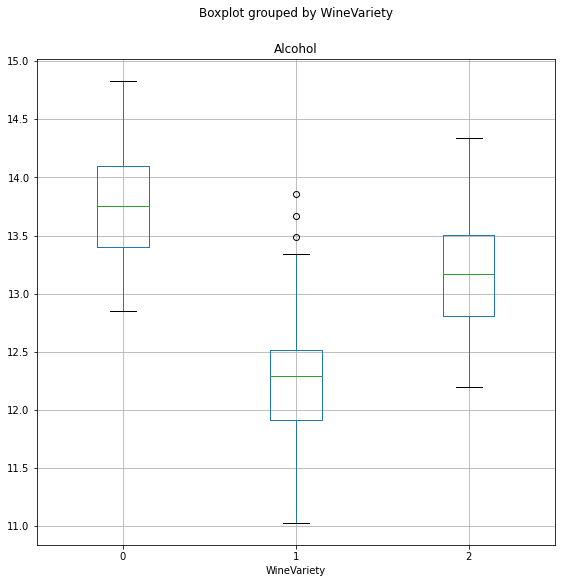

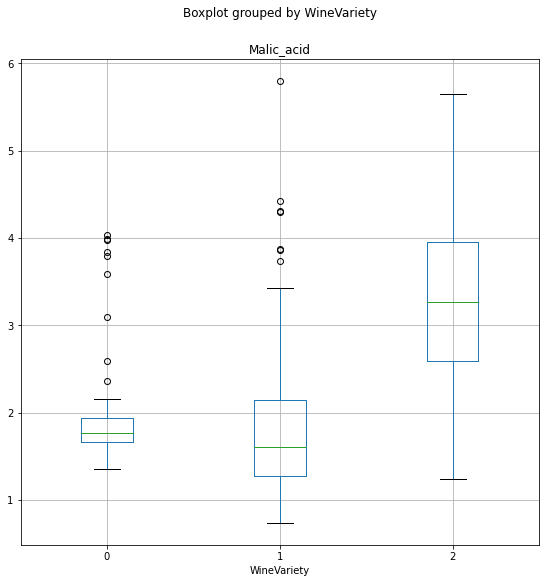

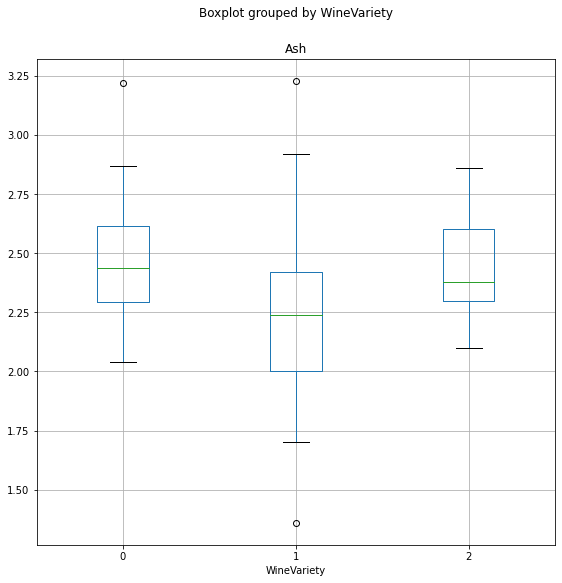

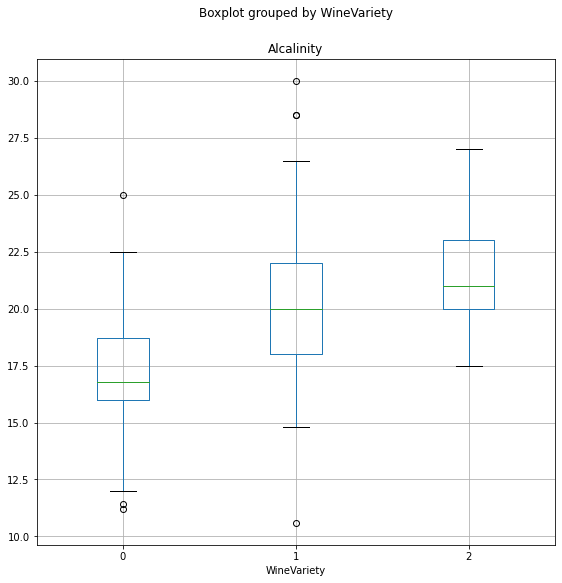

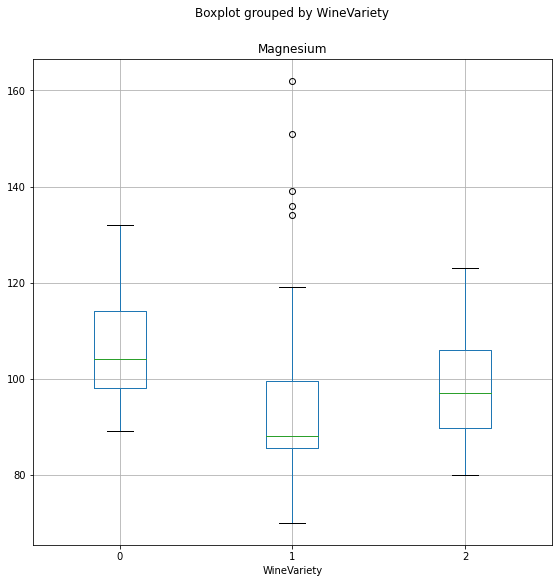

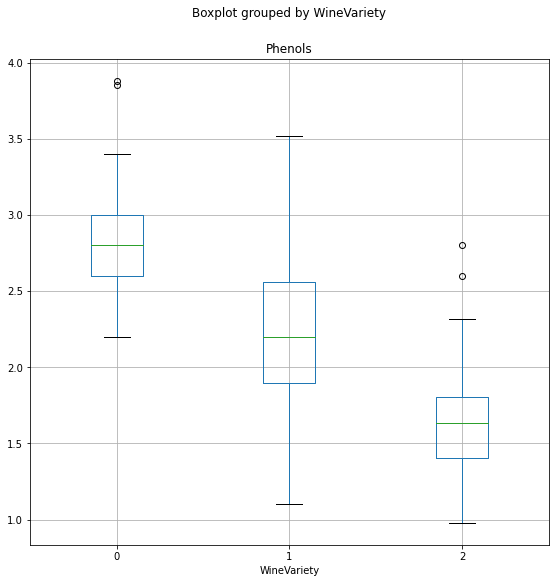

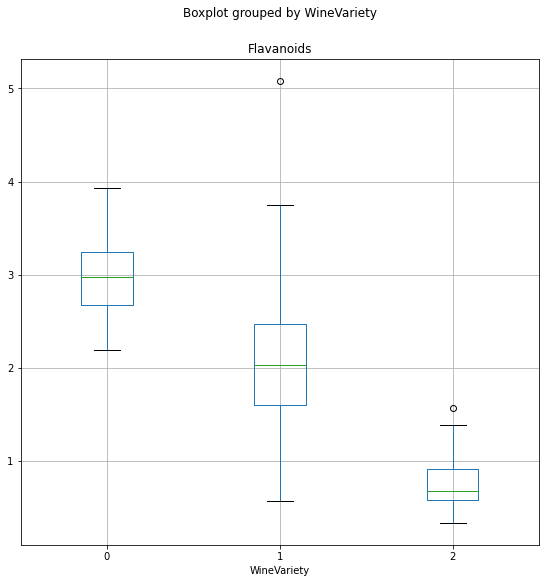

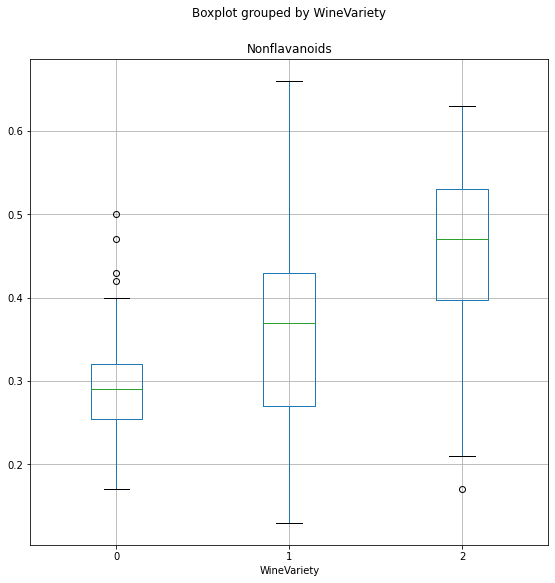

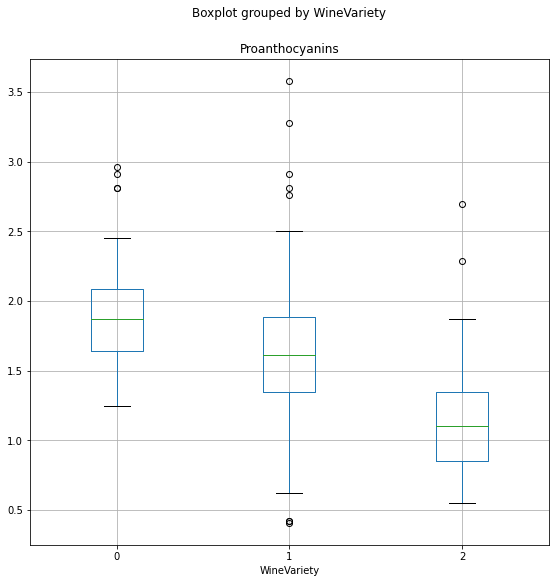

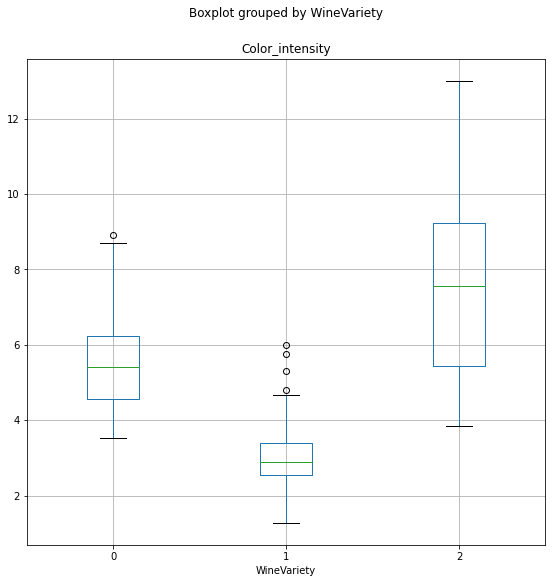

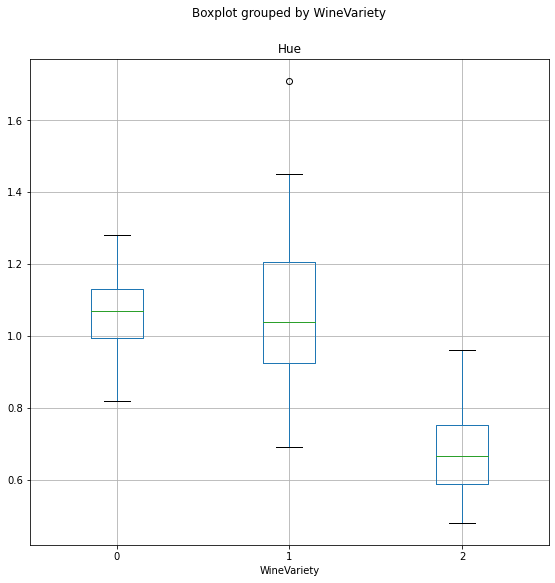

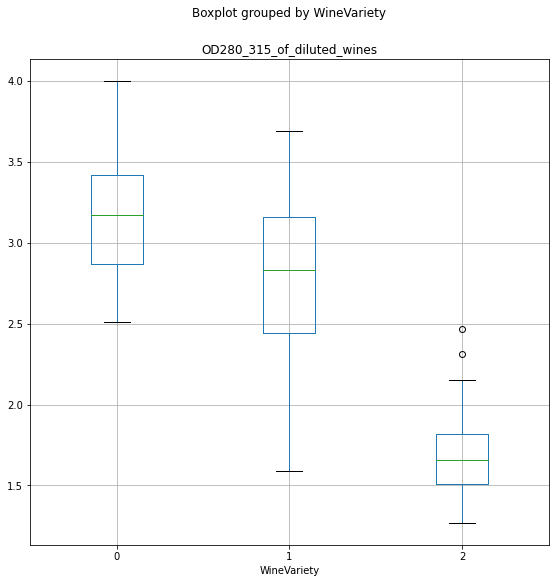

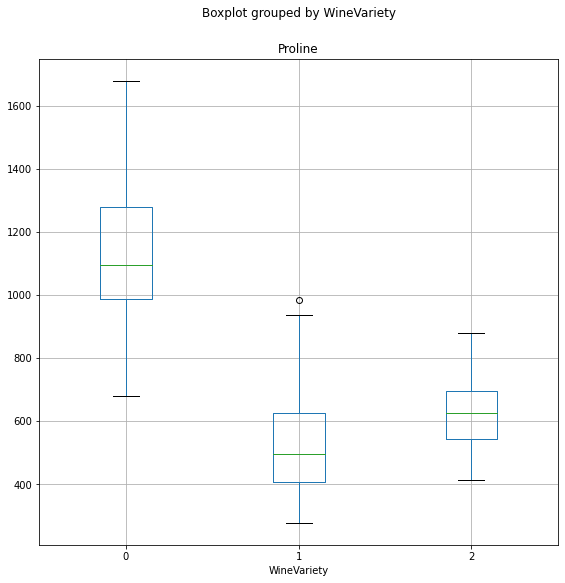

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

wine_features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids', 'Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
wine_label = 'WineVariety'
for col in wine_features:
    data.boxplot(column=col, by=wine_label, figsize=(9,9))
    plt.title(col)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and labels
wine_X, wine_y = data[wine_features].values, data[wine_label].values

# Split data 70%-30% into training set and test set
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(wine_X, wine_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=wine_y)

print ('Training Set: %d, Test Set: %d \n' % (x_wine_train.shape[0], x_wine_test.shape[0]))

Training Set: 124, Test Set: 54 



In [7]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_wine_train, y_wine_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [8]:
wine_predictions = multi_model.predict(x_wine_test)
print('Predicted labels: ', wine_predictions[:15])
print('Actual labels   : ' ,y_wine_test[:15])

Predicted labels:  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]
Actual labels   :  [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2]


In [9]:
from sklearn. metrics import classification_report

print(classification_report(y_wine_test, wine_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9616228070175438
Overall Recall: 0.9682539682539683


In [11]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_wine_test, wine_predictions)
print(mcm)

[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


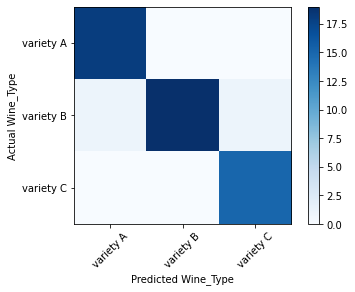

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Wine_Type")
plt.ylabel("Actual Wine_Type")
plt.show()

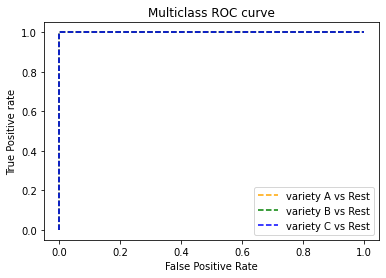

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = multi_model.predict_proba(x_wine_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wine_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [14]:
auc = roc_auc_score(y_wine_test,wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [15]:
import joblib

# Save the model as a pickle file
filename = './wine_model.pkl'
joblib.dump(multi_model, filename)

['./wine_model.pkl']

In [16]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]])
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
wine_pred = multi_model.predict(x_new)[0]
print('Predicted class is', wine_classes[wine_pred])

New sample: [1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
 1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
Predicted class is variety A


In [17]:
# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + wine_classes[prediction] +')')

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (variety A)
1 (variety B)


Use the model with new data observation
When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285]
[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]